In [10]:
import joblib

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

Load The Dataset

In [12]:
# Load the dataset
df = pd.read_csv("Walmart.csv")

Convert Date to datetime

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Exploratory Data Analysis (EDA)

In [14]:
# 1.1 Summary Statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
             Store                 Date  Weekly_Sales  Holiday_Flag  \
count  6435.000000                 6435  6.435000e+03   6435.000000   
mean     23.000000  2011-06-17 00:00:00  1.046965e+06      0.069930   
min       1.000000  2010-02-05 00:00:00  2.099862e+05      0.000000   
25%      12.000000  2010-10-08 00:00:00  5.533501e+05      0.000000   
50%      23.000000  2011-06-17 00:00:00  9.607460e+05      0.000000   
75%      34.000000  2012-02-24 00:00:00  1.420159e+06      0.000000   
max      45.000000  2012-10-26 00:00:00  3.818686e+06      1.000000   
std      12.988182                  NaN  5.643666e+05      0.255049   

       Temperature   Fuel_Price          CPI  Unemployment  
count  6435.000000  6435.000000  6435.000000   6435.000000  
mean     60.663782     3.358607   171.578394      7.999151  
min      -2.060000     2.472000   126.064000      3.879000  
25%      47.460000     2.933000   131.735000      6.891000  
50%      62.670000     3.445000   1

In [15]:
# 1.2 Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [16]:
# 1.3 Data Types and Basic Info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
None


In [17]:
# 1.4 Unique Stores
print("\nNumber of Unique Stores:", df['Store'].nunique())


Number of Unique Stores: 45


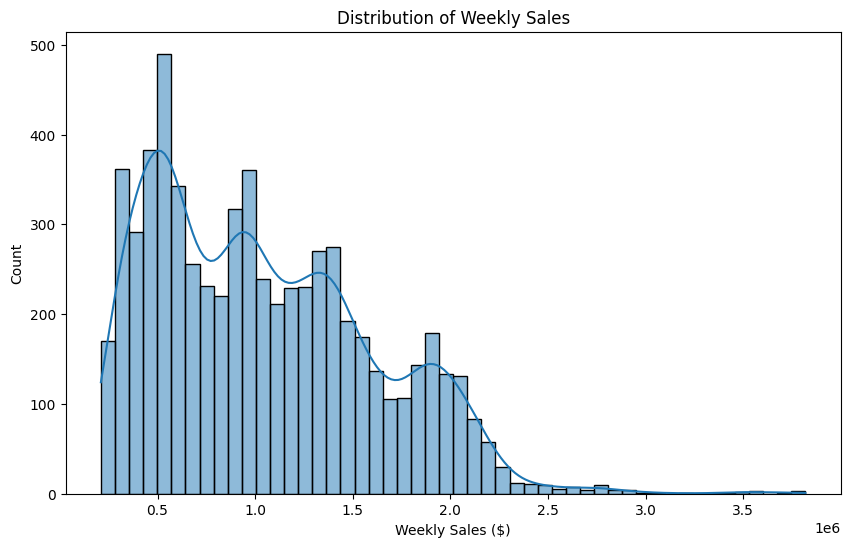

In [18]:
# 1.5 Distribution Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales ($)')
plt.savefig('weekly_sales_histogram.png')
plt.show()

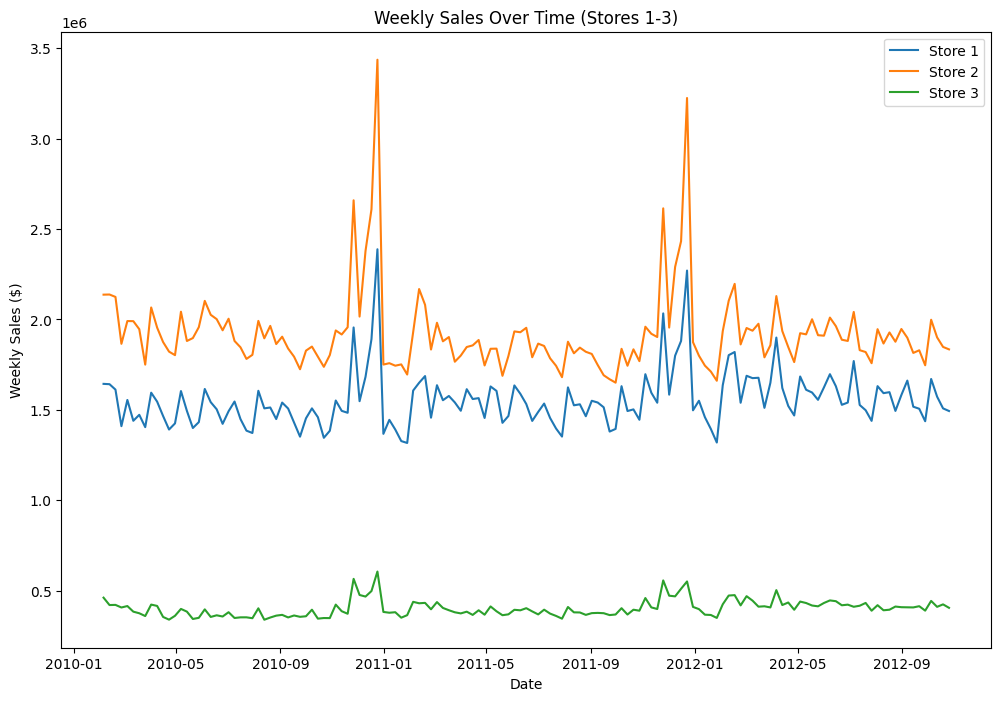

In [19]:
# 1.6 Time-Series Analysis for Stores 1, 2, 3
plt.figure(figsize=(12, 8))
for store in [1, 2, 3]:
    store_data = df[df['Store'] == store]
    plt.plot(store_data['Date'], store_data['Weekly_Sales'], label=f'Store {store}')
plt.title('Weekly Sales Over Time (Stores 1-3)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')
plt.legend()
plt.savefig('sales_time_series.png')
plt.show()

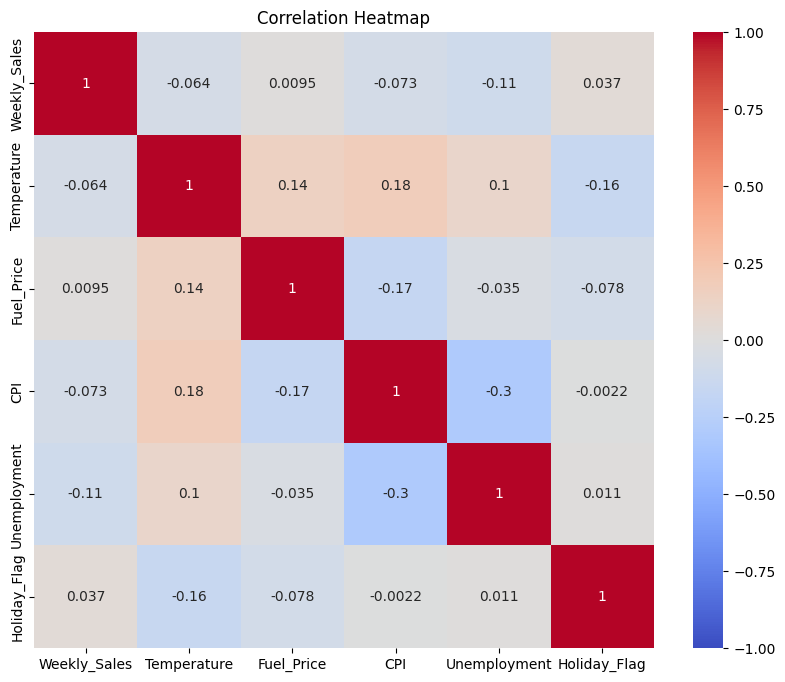


Correlation Matrix:
              Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment  \
Weekly_Sales      1.000000    -0.063810    0.009464 -0.072634     -0.106176   
Temperature      -0.063810     1.000000    0.144982  0.176888      0.101158   
Fuel_Price        0.009464     0.144982    1.000000 -0.170642     -0.034684   
CPI              -0.072634     0.176888   -0.170642  1.000000     -0.302020   
Unemployment     -0.106176     0.101158   -0.034684 -0.302020      1.000000   
Holiday_Flag      0.036891    -0.155091   -0.078347 -0.002162      0.010960   

              Holiday_Flag  
Weekly_Sales      0.036891  
Temperature      -0.155091  
Fuel_Price       -0.078347  
CPI              -0.002162  
Unemployment      0.010960  
Holiday_Flag      1.000000  


In [20]:
# 1.7 Correlation Analysis
plt.figure(figsize=(10, 8))
corr = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()
print("\nCorrelation Matrix:")
print(corr)

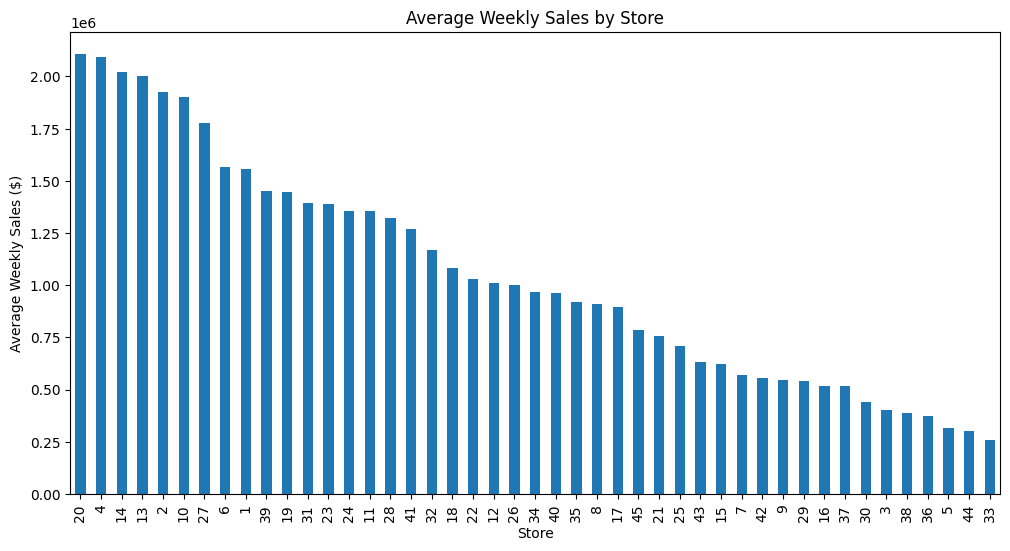


Average Weekly Sales by Store:
Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
10    1.899425e+06
27    1.775216e+06
6     1.564728e+06
1     1.555264e+06
39    1.450668e+06
19    1.444999e+06
31    1.395901e+06
23    1.389864e+06
24    1.356755e+06
11    1.356383e+06
28    1.323522e+06
41    1.268125e+06
32    1.166568e+06
18    1.084718e+06
22    1.028501e+06
12    1.009002e+06
26    1.002912e+06
34    9.667816e+05
40    9.641280e+05
35    9.197250e+05
8     9.087495e+05
17    8.935814e+05
45    7.859814e+05
21    7.560691e+05
25    7.067215e+05
43    6.333247e+05
15    6.233125e+05
7     5.706173e+05
42    5.564039e+05
9     5.439806e+05
29    5.394514e+05
16    5.192477e+05
37    5.189003e+05
30    4.385796e+05
3     4.027044e+05
38    3.857317e+05
36    3.735120e+05
5     3.180118e+05
44    3.027489e+05
33    2.598617e+05
Name: Weekly_Sales, dtype: float64


In [21]:
# 1.8 Store-Specific Analysis
store_sales = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
store_sales.plot(kind='bar')
plt.title('Average Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales ($)')
plt.savefig('store_sales_bar.png')
plt.show()
print("\nAverage Weekly Sales by Store:")
print(store_sales)

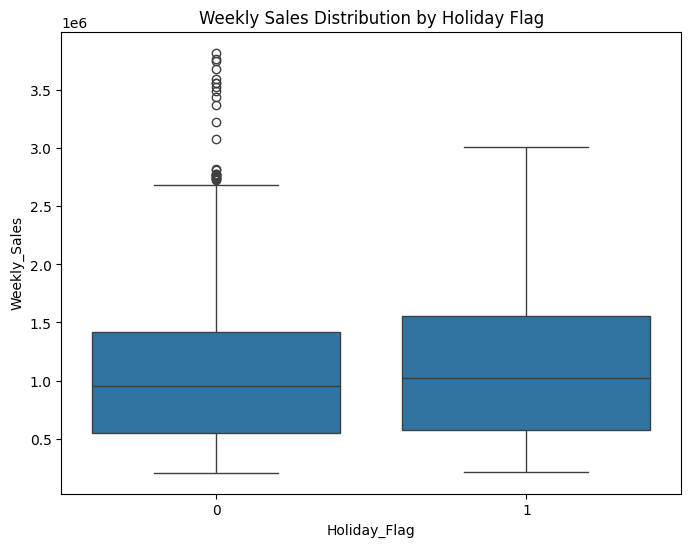


Average Sales by Holiday Flag:
Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64


In [22]:
# 1.9 Holiday Impact
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title('Weekly Sales Distribution by Holiday Flag')
plt.savefig('holiday_vs_nonholiday_sales.png')
plt.show()
print("\nAverage Sales by Holiday Flag:")
print(holiday_sales)

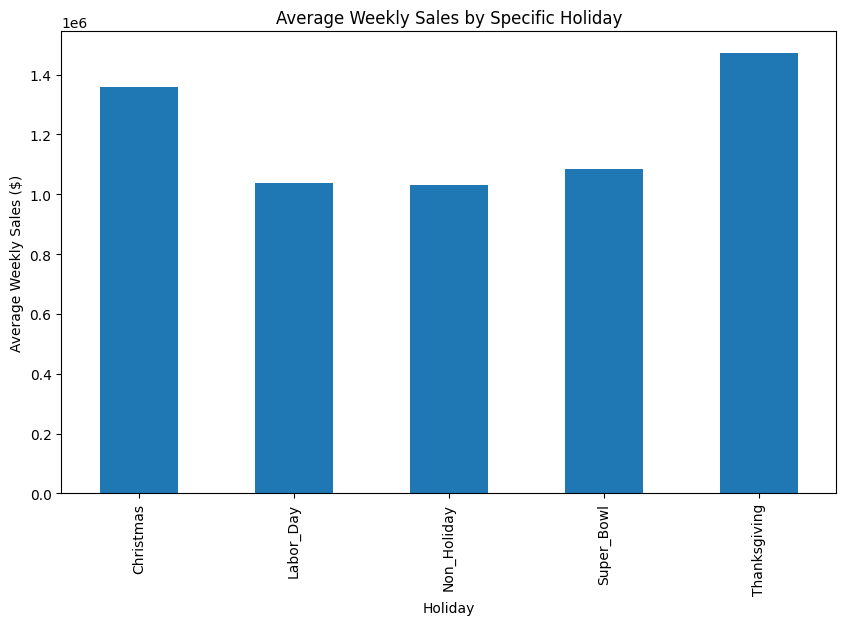


Average Weekly Sales by Specific Holiday:
Specific_Holiday
Christmas       1.357804e+06
Labor_Day       1.036883e+06
Non_Holiday     1.029803e+06
Super_Bowl      1.085739e+06
Thanksgiving    1.471273e+06
Name: Weekly_Sales, dtype: float64


In [23]:
# 1.10 Specific Holiday Analysis
# Approximate holiday dates based on typical U.S. holiday weeks
def flag_holidays(date):
    if date.month == 2 and 5 <= date.day <= 15:  # Super Bowl (early February)
        return 'Super_Bowl'
    elif date.month == 9 and 1 <= date.day <= 10:  # Labor Day (early September)
        return 'Labor_Day'
    elif date.month == 11 and 20 <= date.day <= 30:  # Thanksgiving (late November)
        return 'Thanksgiving'
    elif date.month == 12 and 20 <= date.day <= 31:  # Christmas (late December)
        return 'Christmas'
    else:
        return 'Non_Holiday'

df['Specific_Holiday'] = df['Date'].apply(flag_holidays)
holiday_specific_sales = df.groupby('Specific_Holiday')['Weekly_Sales'].mean()
plt.figure(figsize=(10, 6))
holiday_specific_sales.plot(kind='bar')
plt.title('Average Weekly Sales by Specific Holiday')
plt.xlabel('Holiday')
plt.ylabel('Average Weekly Sales ($)')
plt.savefig('specific_holiday_sales.png')
plt.show()
print("\nAverage Weekly Sales by Specific Holiday:")
print(holiday_specific_sales)

In [24]:
# 1.11 Outlier Detection (Global and Store-Specific)
df['Z_Score_Global'] = (df['Weekly_Sales'] - df['Weekly_Sales'].mean()) / df['Weekly_Sales'].std()
global_outliers = df[df['Z_Score_Global'].abs() > 3]
print("\nGlobal Outliers (z-score > 3):")
print(global_outliers[['Store', 'Date', 'Weekly_Sales']])


Global Outliers (z-score > 3):
      Store       Date  Weekly_Sales
189       2 2010-12-24    3436007.68
241       2 2011-12-23    3224369.80
471       4 2010-11-26    2789469.45
475       4 2010-12-24    3526713.39
523       4 2011-11-25    3004702.33
526       4 2011-12-16    2771397.17
527       4 2011-12-23    3676388.98
1329     10 2010-11-26    2939946.38
1332     10 2010-12-17    2811646.85
1333     10 2010-12-24    3749057.69
1381     10 2011-11-25    2950198.64
1385     10 2011-12-23    3487986.89
1758     13 2010-11-26    2766400.05
1761     13 2010-12-17    2771646.81
1762     13 2010-12-24    3595903.20
1810     13 2011-11-25    2864170.61
1813     13 2011-12-16    2760346.71
1814     13 2011-12-23    3556766.03
1901     14 2010-11-26    2921709.71
1904     14 2010-12-17    2762861.41
1905     14 2010-12-24    3818686.45
1957     14 2011-12-23    3369068.99
2759     20 2010-11-26    2811634.04
2761     20 2010-12-10    2752122.08
2762     20 2010-12-17    2819193.17
2763  

In [25]:

# Store-specific outliers
df['Z_Score_Store'] = df.groupby('Store')['Weekly_Sales'].transform(lambda x: (x - x.mean()) / x.std())
store_outliers = df[df['Z_Score_Store'].abs() > 3]
print("\nStore-Specific Outliers (z-score > 3):")
print(store_outliers[['Store', 'Date', 'Weekly_Sales']])


Store-Specific Outliers (z-score > 3):
      Store       Date  Weekly_Sales
46        1 2010-12-24    2387950.20
94        1 2011-11-25    2033320.66
98        1 2011-12-23    2270188.99
185       2 2010-11-26    2658725.29
189       2 2010-12-24    3436007.68
...     ...        ...           ...
5818     41 2011-12-23    2263722.68
6105     43 2011-12-30     505405.85
6334     45 2010-11-26    1182500.16
6338     45 2010-12-24    1682862.03
6390     45 2011-12-23    1521957.99

[134 rows x 3 columns]


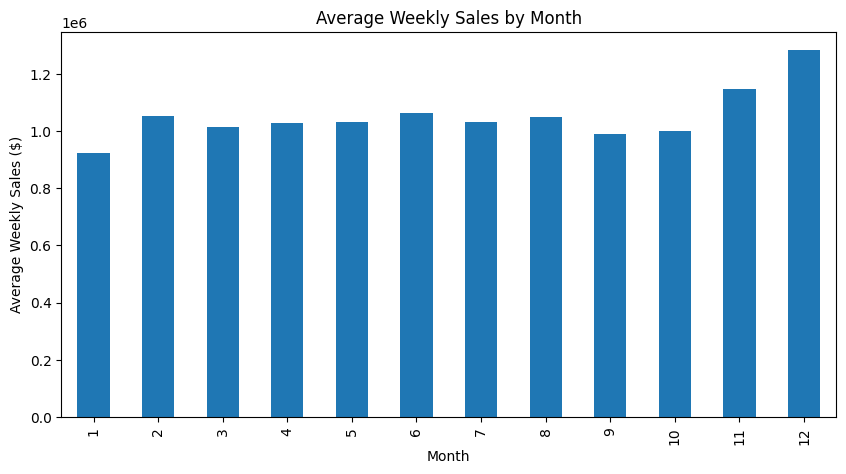


Average Weekly Sales by Month:
Month
1     9.238846e+05
2     1.053200e+06
3     1.013309e+06
4     1.026762e+06
5     1.031714e+06
6     1.064325e+06
7     1.031748e+06
8     1.048017e+06
9     9.893353e+05
10    9.996321e+05
11    1.147266e+06
12    1.281864e+06
Name: Weekly_Sales, dtype: float64


In [26]:
# 1.12 Monthly Sales Patterns
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='bar')
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales ($)')
plt.savefig('monthly_sales_bar.png')
plt.show()
print("\nAverage Weekly Sales by Month:")
print(monthly_sales)

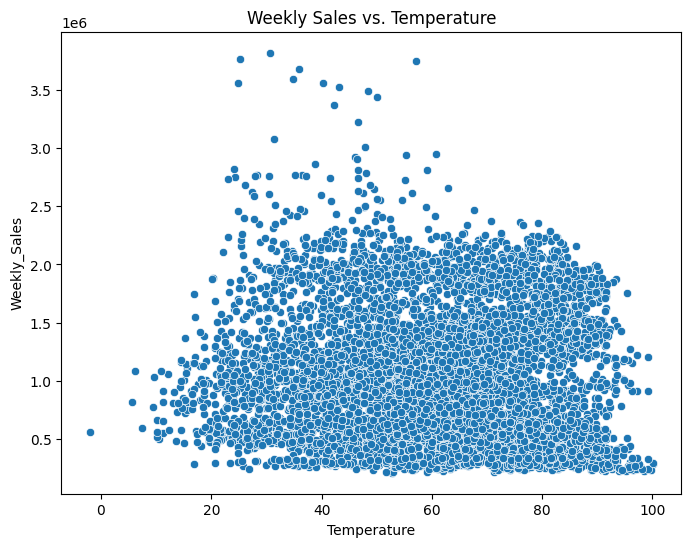

In [27]:
# 1.13 Scatter Plots for Relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs. Temperature')
plt.savefig('sales_vs_temperature.png')
plt.show()

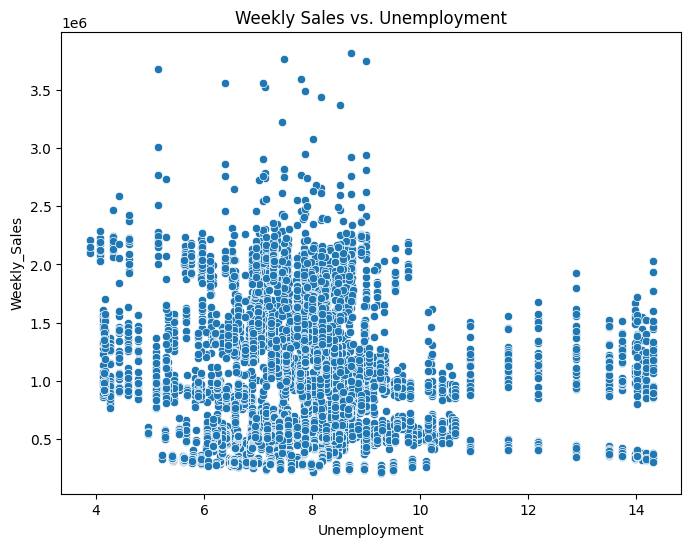

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs. Unemployment')
plt.savefig('sales_vs_unemployment.png')
plt.show()

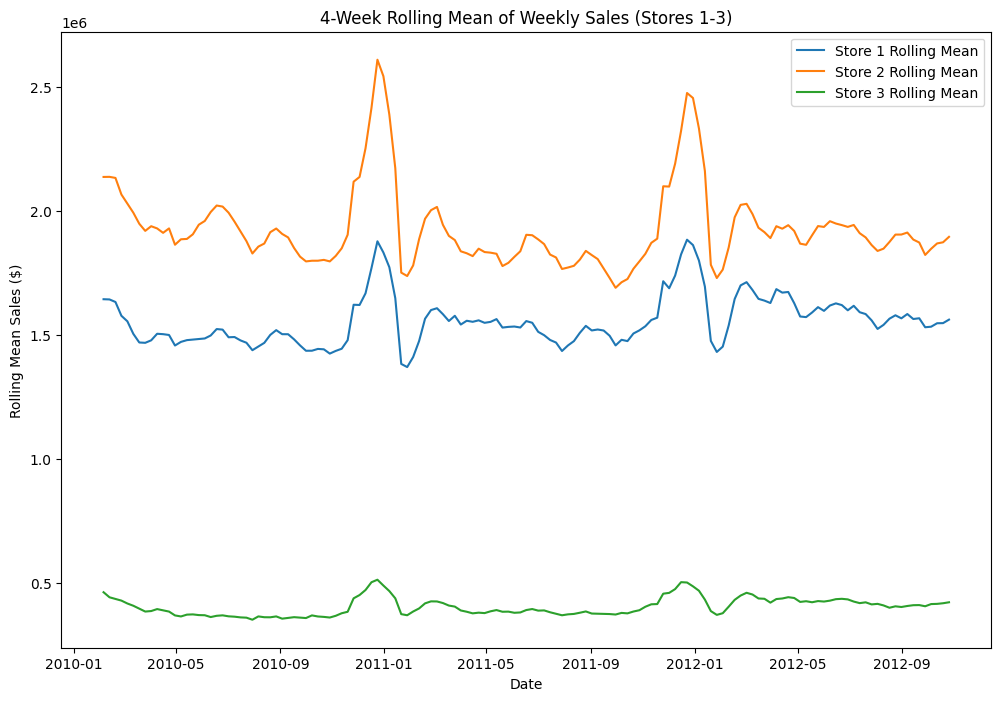

In [29]:
# 1.14 Rolling Statistics
df['Rolling_Mean'] = df.groupby('Store')['Weekly_Sales'].transform(lambda x: x.rolling(window=4, min_periods=1).mean())
df['Rolling_Std'] = df.groupby('Store')['Weekly_Sales'].transform(lambda x: x.rolling(window=4, min_periods=1).std())
plt.figure(figsize=(12, 8))
for store in [1, 2, 3]:
    store_data = df[df['Store'] == store]
    plt.plot(store_data['Date'], store_data['Rolling_Mean'], label=f'Store {store} Rolling Mean')
plt.title('4-Week Rolling Mean of Weekly Sales (Stores 1-3)')
plt.xlabel('Date')
plt.ylabel('Rolling Mean Sales ($)')
plt.legend()
plt.savefig('rolling_mean_sales.png')
plt.show()

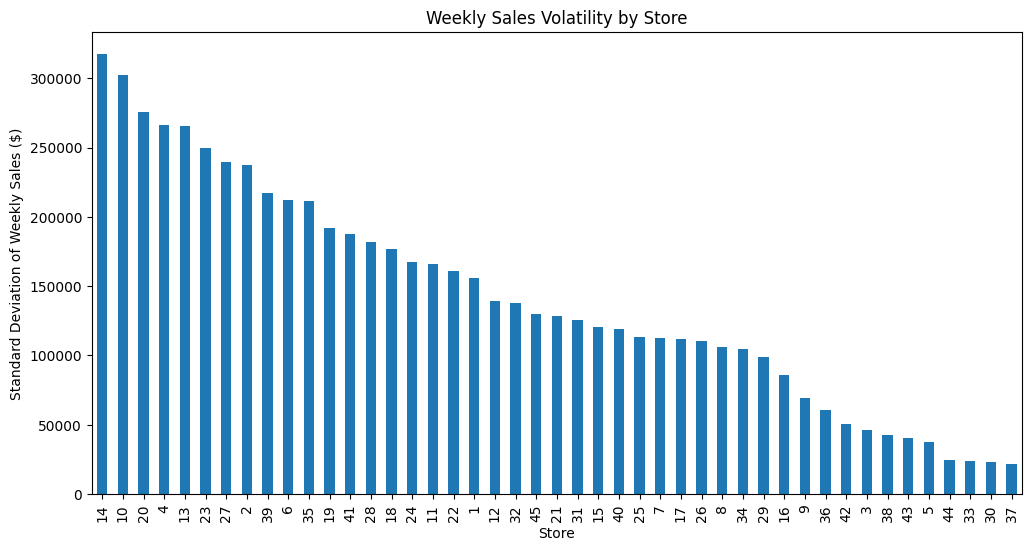


Weekly Sales Volatility by Store:
Store
14    317569.949476
10    302262.062504
20    275900.562742
4     266201.442297
13    265506.995776
23    249788.038068
27    239930.135688
2     237683.694682
39    217466.454833
6     212525.855862
35    211243.457791
19    191722.638730
41    187907.162766
28    181758.967539
18    176641.510839
24    167745.677567
11    165833.887863
22    161251.350631
1     155980.767761
12    139166.871880
32    138017.252087
45    130168.526635
21    128752.812853
31    125855.942933
15    120538.652043
40    119002.112858
25    112976.788600
7     112585.469220
17    112162.936087
26    110431.288141
8     106280.829881
34    104630.164676
29     99120.136596
16     85769.680133
9      69028.666585
36     60725.173579
42     50262.925530
3      46319.631557
38     42768.169450
43     40598.413260
5      37737.965745
44     24762.832015
33     24132.927322
30     22809.665590
37     21837.461190
Name: Weekly_Sales, dtype: float64


In [30]:
# 1.15 Volatility Analysis
store_volatility = df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
store_volatility.plot(kind='bar')
plt.title('Weekly Sales Volatility by Store')
plt.xlabel('Store')
plt.ylabel('Standard Deviation of Weekly Sales ($)')
plt.savefig('store_volatility_bar.png')
plt.show()
print("\nWeekly Sales Volatility by Store:")
print(store_volatility)

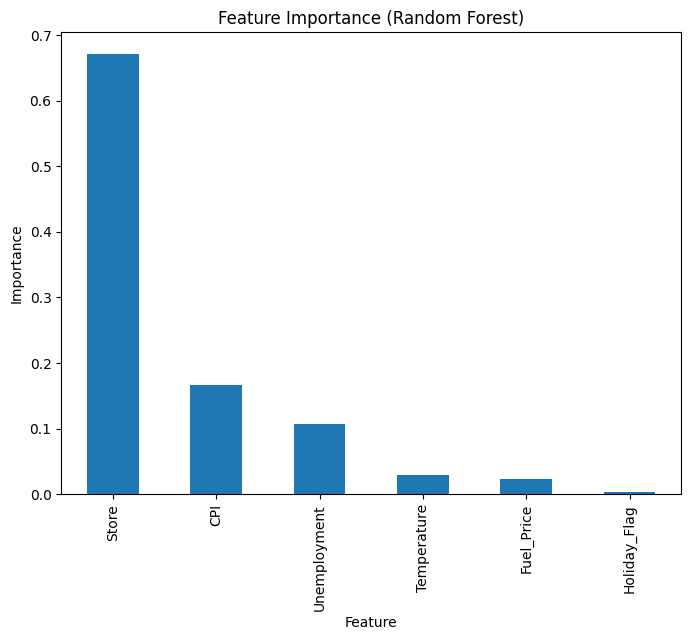


Feature Importance (Random Forest):
Store           0.670771
CPI             0.166394
Unemployment    0.106453
Temperature     0.029292
Fuel_Price      0.023597
Holiday_Flag    0.003493
dtype: float64


In [31]:
# 1.16 Feature Importance (Preliminary Random Forest)
features = ['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag']
X = df[features]
y = df['Weekly_Sales']
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importance = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.savefig('feature_importance.png')
plt.show()
print("\nFeature Importance (Random Forest):")
print(feature_importance)

<Figure size 1200x600 with 0 Axes>

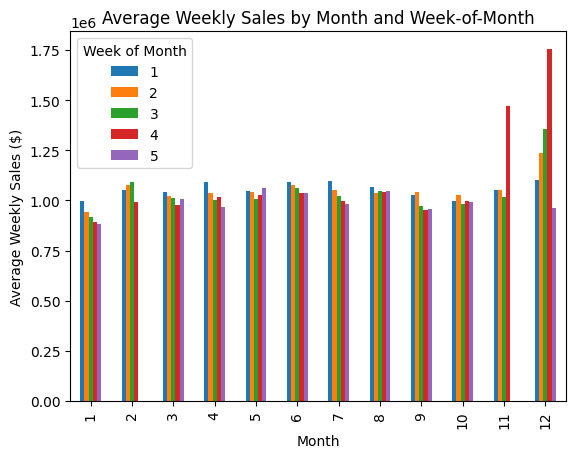


Average Weekly Sales by Month and Week-of-Month:
Week_of_Month             1             2             3             4  \
Month                                                                   
1              9.990094e+05  9.422096e+05  9.194964e+05  8.943291e+05   
2              1.051774e+06  1.079128e+06  1.090298e+06  9.915995e+05   
3              1.042319e+06  1.022468e+06  1.013058e+06  9.778071e+05   
4              1.091742e+06  1.036163e+06  1.001700e+06  1.015763e+06   
5              1.044291e+06  1.043520e+06  1.008893e+06  1.024489e+06   
6              1.090683e+06  1.075166e+06  1.062828e+06  1.038233e+06   
7              1.094437e+06  1.050804e+06  1.020884e+06  9.945216e+05   
8              1.064492e+06  1.037907e+06  1.046909e+06  1.042770e+06   
9              1.028565e+06  1.042427e+06  9.711165e+05  9.513419e+05   
10             9.978502e+05  1.025505e+06  9.825682e+05  9.957758e+05   
11             1.049306e+06  1.051100e+06  1.017384e+06  1.471273e+06   
1

In [32]:
# Additional EDA: Week-of-Month Analysis
df['Week_of_Month'] = df['Date'].dt.day // 7 + 1
week_of_month_sales = df.groupby(['Month', 'Week_of_Month'])['Weekly_Sales'].mean().unstack()
plt.figure(figsize=(12, 6))
week_of_month_sales.plot(kind='bar', stacked=False)
plt.title('Average Weekly Sales by Month and Week-of-Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales ($)')
plt.legend(title='Week of Month')
plt.savefig('week_of_month_sales.png')
plt.show()
print("\nAverage Weekly Sales by Month and Week-of-Month:")
print(week_of_month_sales)


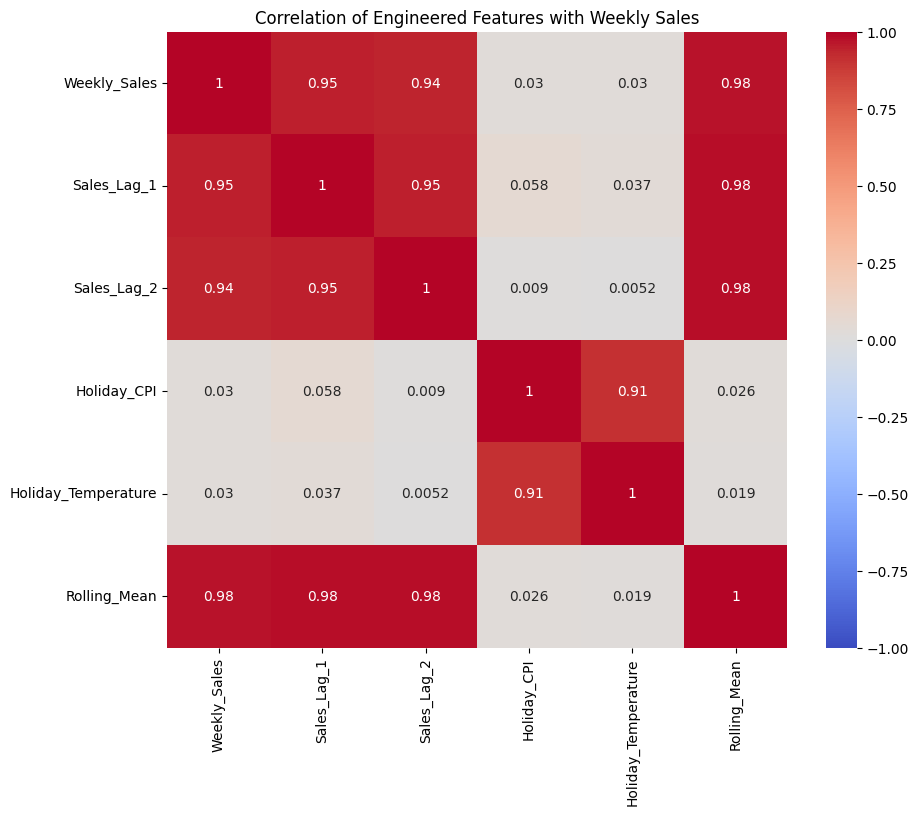


Correlation of Engineered Features with Weekly Sales:
Weekly_Sales           1.000000
Sales_Lag_1            0.951354
Sales_Lag_2            0.940753
Holiday_CPI            0.030392
Holiday_Temperature    0.029733
Rolling_Mean           0.976462
Name: Weekly_Sales, dtype: float64


In [33]:

# Validate Engineered Features
df['Sales_Lag_1'] = df.groupby('Store')['Weekly_Sales'].shift(1)
df['Sales_Lag_2'] = df.groupby('Store')['Weekly_Sales'].shift(2)
df['Holiday_CPI'] = df['Holiday_Flag'] * df['CPI']
df['Holiday_Temperature'] = df['Holiday_Flag'] * df['Temperature']
df['Rolling_Mean'] = df.groupby('Store')['Weekly_Sales'].transform(lambda x: x.rolling(window=4, min_periods=1).mean())
engineered_corr = df[['Weekly_Sales', 'Sales_Lag_1', 'Sales_Lag_2', 'Holiday_CPI', 'Holiday_Temperature', 'Rolling_Mean']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(engineered_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Engineered Features with Weekly Sales')
plt.savefig('engineered_features_corr.png')
plt.show()
print("\nCorrelation of Engineered Features with Weekly Sales:")
print(engineered_corr['Weekly_Sales'])

# Data Preprocessing

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [35]:
# 2.1 Feature Engineering
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week
df['Week_of_Month'] = df['Date'].dt.day // 7 + 1  # Added based on EDA enhancement
df['Sales_Lag_1'] = df.groupby('Store')['Weekly_Sales'].shift(1)
df['Sales_Lag_2'] = df.groupby('Store')['Weekly_Sales'].shift(2)
df['Holiday_CPI'] = df['Holiday_Flag'] * df['CPI']
df['Holiday_Temperature'] = df['Holiday_Flag'] * df['Temperature']
df['Rolling_Mean'] = df.groupby('Store')['Weekly_Sales'].transform(lambda x: x.rolling(window=4, min_periods=1).mean())


In [36]:
# 2.2 Handle Missing Values
df = df.dropna()

In [37]:
# 2.3 Encode Categorical Variables
le = LabelEncoder()
df['Store_Encoded'] = le.fit_transform(df['Store'])
df['Specific_Holiday_Encoded'] = le.fit_transform(df['Specific_Holiday'])

In [38]:
# 2.4 Handle Outliers (Store-Specific)
df['Weekly_Sales_Capped'] = df.groupby('Store')['Weekly_Sales'].transform(lambda x: x.clip(upper=x.mean() + 3 * x.std()))

In [39]:
# 2.5 Scale Numerical Features
scaler = StandardScaler()
numerical_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Sales_Lag_1', 'Sales_Lag_2', 'Holiday_CPI', 'Holiday_Temperature', 'Rolling_Mean']
df[[f'{col}_Scaled' for col in numerical_features]] = scaler.fit_transform(df[numerical_features])

In [40]:
# 2.6 Drop Temporary Columns
df = df.drop(columns=['Z_Score_Global', 'Z_Score_Store'])

In [41]:
# Save Preprocessed Dataset
df.to_csv('walmart_preprocessed_enhanced_v2.csv', index=False)

In [43]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the preprocessed dataset
df = pd.read_csv('walmart_preprocessed_enhanced_v2.csv')

# Features and target
features = ['Store_Encoded', 'Year', 'Month', 'Week', 'Week_of_Month', 'Holiday_Flag',
            'Temperature_Scaled', 'Fuel_Price_Scaled', 'CPI_Scaled', 'Unemployment_Scaled',
            'Sales_Lag_1_Scaled', 'Sales_Lag_2_Scaled', 'Holiday_CPI_Scaled',
            'Holiday_Temperature_Scaled', 'Rolling_Mean_Scaled', 'Specific_Holiday_Encoded']
target = 'Weekly_Sales_Capped'

# Prepare data
X = df[features]
y = df[target]

# Split data (temporal split: first 80% for train, last 20% for test)
train_size = int(0.8 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define holiday weights (e.g., 5x for holiday weeks, 1x otherwise)
df['Holiday_Weight'] = df['Holiday_Flag'].apply(lambda x: 5 if x == 1 else 1)
holiday_weights = df.loc[X_test.index, 'Holiday_Weight'].values

# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Compute RMSE manually for compatibility with older scikit-learn versions
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    weighted_rmse = np.sqrt(np.average((y_test - preds)**2, weights=holiday_weights))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results[name] = {
        'RMSE': rmse,
        'Weighted RMSE': weighted_rmse,
        'MAE': mae,
        'R² Score': r2
    }

# Convert to DataFrame and sort by Weighted RMSE
results_df = pd.DataFrame(results).T.sort_values(by='Weighted RMSE')
print("\nModel Performance Metrics:")
print(results_df)

# Feature importance for ensemble models
for name, model in [("Random Forest", models["Random Forest"]),
                    ("Gradient Boosting", models["Gradient Boosting"]),
                    ("XGBoost", models["XGBoost"])]:
    if hasattr(model, 'feature_importances_'):
        feat_importance = pd.DataFrame({
            'Feature': features,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        print(f"\nTop 5 Feature Importances for {name}:")
        print(feat_importance.head())
        plt.figure(figsize=(10, 6))
        plt.bar(feat_importance['Feature'][:5], feat_importance['Importance'][:5])
        plt.title(f'Top 5 Feature Importance - {name}')
        plt.xticks(rotation=45)
        plt.savefig(f'{name}_feature_importance.png')
        plt.close()


Model Performance Metrics:
                           RMSE  Weighted RMSE           MAE  R² Score
Gradient Boosting  41980.804810   49973.936702  29899.148448  0.987932
Random Forest      42597.373490   54031.951466  29227.920407  0.987575
XGBoost            42584.854700   54538.388766  30025.873728  0.987583
Linear Regression  61804.891853   70814.731182  38358.324242  0.973845
Ridge Regression   61903.341868   71429.993474  38465.421798  0.973761

Top 5 Feature Importances for Random Forest:
                     Feature  Importance
14       Rolling_Mean_Scaled    0.948310
10        Sales_Lag_1_Scaled    0.019932
3                       Week    0.014021
4              Week_of_Month    0.003804
15  Specific_Holiday_Encoded    0.003757

Top 5 Feature Importances for Gradient Boosting:
                     Feature  Importance
14       Rolling_Mean_Scaled    0.953944
10        Sales_Lag_1_Scaled    0.019541
3                       Week    0.016567
15  Specific_Holiday_Encoded    0.005961

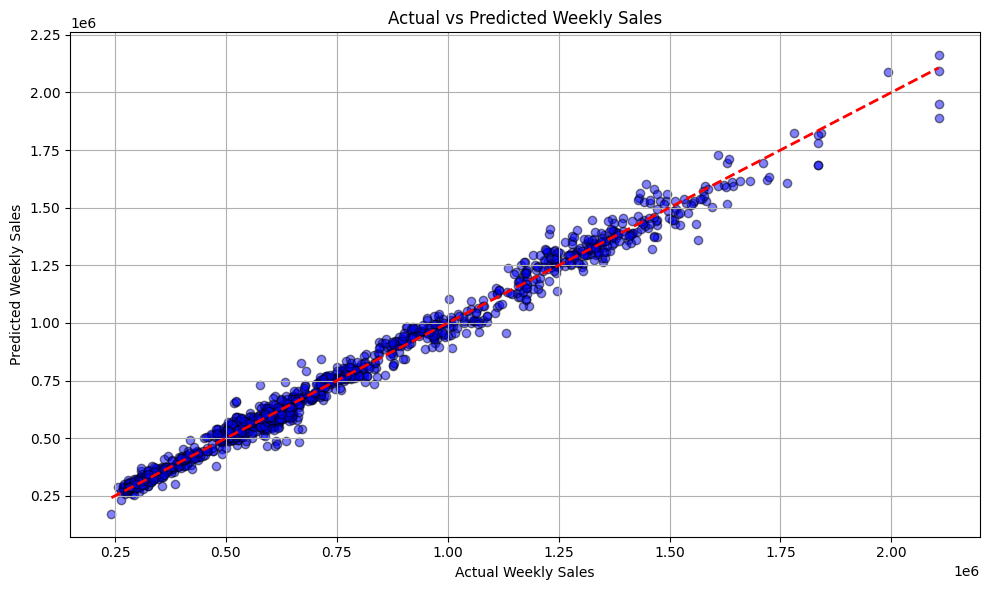

In [44]:
import joblib

# Save the best model (Gradient Boosting)
best_model = models["Gradient Boosting"]
joblib.dump(best_model, "best_model_gradient_boosting.pkl")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model.predict(X_test), alpha=0.5, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')
plt.show()


 Inventory Optimization & IoT Simulation using the Trained Model

In [45]:
import joblib
import numpy as np

# Load the saved best model
loaded_model = joblib.load("best_model_gradient_boosting.pkl")

# Predict weekly sales for test data
preds = loaded_model.predict(X_test)

# Inventory Optimization: Add 20% buffer to predicted weekly sales
restock = preds * 1.2
print("\n📦 Sample Restock Amounts for Next Week (with 20% Buffer):")
print(np.round(restock[:5], 2))

# IoT Simulation: Estimate daily sales assuming even distribution across the week
daily_sales = preds / 7
print("\n📊 Sample IoT-Based Daily Sales Estimates:")
print(np.round(daily_sales[:5], 2))



📦 Sample Restock Amounts for Next Week (with 20% Buffer):
[659712.81 606059.7  620405.28 607356.48 606335.29]

📊 Sample IoT-Based Daily Sales Estimates:
[78537.24 72149.96 73857.77 72304.34 72182.77]


Validate the Model

CV Fold RMSE: 77369.32
CV Fold RMSE: 74807.46
CV Fold RMSE: 70832.57
CV Fold RMSE: 50823.96
CV Fold RMSE: 45327.51


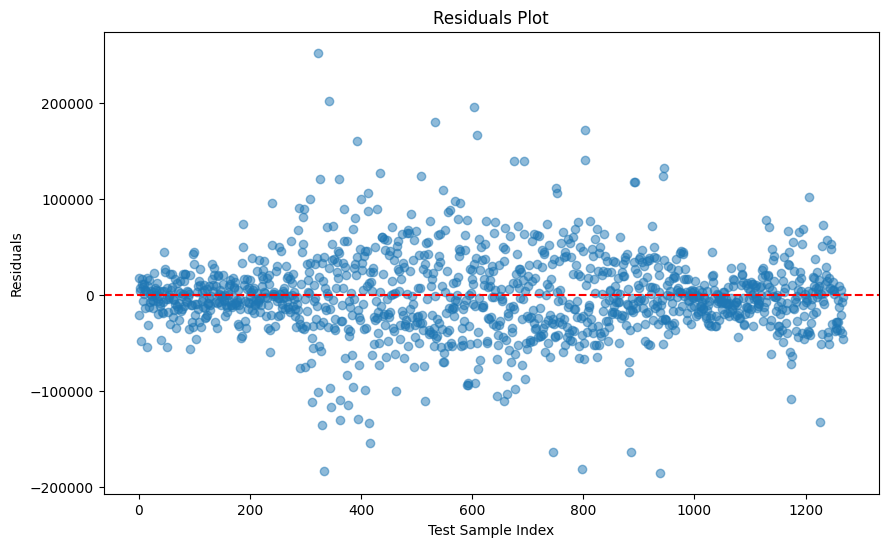

In [46]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
for train_idx, test_idx in tscv.split(X):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]
    loaded_model.fit(X_train_cv, y_train_cv)
    preds_cv = loaded_model.predict(X_test_cv)
    rmse_cv = np.sqrt(mean_squared_error(y_test_cv, preds_cv))
    print(f"CV Fold RMSE: {rmse_cv:.2f}")

# Residual Analysis
residuals = y_test - loaded_model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Test Sample Index')
plt.ylabel('Residuals')
plt.savefig('residuals_plot.png')
plt.show()

Enhance Inventory Optimization

In [47]:
import pandas as pd
import numpy as np

# Store-Level Aggregation
restock_df = pd.DataFrame({'Store': df.loc[X_test.index, 'Store_Encoded'], 'Restock': restock})
store_restock = restock_df.groupby('Store')['Restock'].sum().sort_values(ascending=False)
print("\n🏪 Total Restock by Store (Top 5):")
print(store_restock.head())

# Seasonal Adjustment
holiday_mask = df.loc[X_test.index, 'Holiday_Flag'] == 1
restock_adjusted = np.where(holiday_mask, restock * 1.5, restock)  # 50% buffer during holidays
print("\n📦 Adjusted Restock Amounts (Holiday Buffer 50%):")
print(np.round(restock_adjusted[:5], 2))


🏪 Total Restock by Store (Top 5):
Store
38    2.446512e+08
40    2.142731e+08
39    1.627187e+08
44    1.326387e+08
42    1.067977e+08
Name: Restock, dtype: float64

📦 Adjusted Restock Amounts (Holiday Buffer 50%):
[659712.81 606059.7  620405.28 607356.48 606335.29]


Develop IoT Simulation with Alerts

In [48]:
# Daily Volatility Adjustment
volatility_factor = df.loc[X_test.index, 'Week'].map(lambda w: 1.2 if w in [51, 52] else 1.0)
daily_sales_adjusted = (preds / 7) * volatility_factor
print("\n📊 Adjusted Daily Sales Estimates (with Volatility):")
print(np.round(daily_sales_adjusted[:5], 2))

# Threshold Alerts
threshold = preds.mean() * 0.1
low_stock_alert = preds < threshold
print(f"\n⚠️ Low Stock Alerts: {low_stock_alert.sum()} weeks below threshold of {threshold:.2f}")
print("Alert Weeks (Index):", X_test.index[low_stock_alert][:5])

#




📊 Adjusted Daily Sales Estimates (with Volatility):
5076    78537.24
5077    72149.96
5078    73857.77
5079    72304.34
5080    72182.77
Name: Week, dtype: float64

⚠️ Low Stock Alerts: 0 weeks below threshold of 76212.71
Alert Weeks (Index): Index([], dtype='int64')


Forecast Future Sales

In [49]:
import pandas as pd
import numpy as np

# Prepare Future Data
last_date = df['Date'].max()
future_dates = pd.date_range(start=last_date, periods=4, freq='W')
future_df = pd.DataFrame(index=range(len(df), len(df) + 4))
future_df['Date'] = future_dates
future_df['Year'] = future_df['Date'].dt.year
future_df['Month'] = future_df['Date'].dt.month
future_df['Week'] = future_df['Date'].dt.isocalendar().week
future_df['Week_of_Month'] = future_df['Date'].dt.day // 7 + 1
future_df['Holiday_Flag'] = 0  # Adjust for known 2025 holidays (e.g., set to 1 for July 4th if applicable)
future_df['Temperature_Scaled'] = df['Temperature_Scaled'].iloc[-1]
future_df['Fuel_Price_Scaled'] = df['Fuel_Price_Scaled'].iloc[-1]
future_df['CPI_Scaled'] = df['CPI_Scaled'].iloc[-1]
future_df['Unemployment_Scaled'] = df['Unemployment_Scaled'].iloc[-1]
future_df['Sales_Lag_1_Scaled'] = df['Sales_Lag_1_Scaled'].iloc[-1]
future_df['Sales_Lag_2_Scaled'] = df['Sales_Lag_2_Scaled'].iloc[-1]
future_df['Rolling_Mean_Scaled'] = df['Rolling_Mean_Scaled'].iloc[-1]
future_df['Store_Encoded'] = df['Store_Encoded'].iloc[-1]  # Or average across stores

# Add missing features with placeholder values based on last known data
future_df['Holiday_CPI_Scaled'] = df['CPI_Scaled'].iloc[-1]  # Assume same as CPI_Scaled unless holiday-adjusted
future_df['Holiday_Temperature_Scaled'] = df['Temperature_Scaled'].iloc[-1]  # Assume same unless holiday-adjusted
future_df['Specific_Holiday_Encoded'] = 0  # Default to 0; adjust for specific holidays if known

X_future = future_df[features]  # Now should match your training columns
future_preds = loaded_model.predict(X_future)
print("\n🌟 Forecasted Weekly Sales for Next 4 Weeks:")
print(np.round(future_preds, 2))


🌟 Forecasted Weekly Sales for Next 4 Weeks:
[781108.65 798996.72 793086.07 782564.89]
